In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
dataset = pd.read_csv('../Datasets/train.csv')

# 1.) Exploratory Data Analysis

In [3]:
dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [14]:
dataset.shape

(7613, 5)

In [15]:
dataset.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [16]:
dataset['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x1e25f7314c0>,
 [Text(0.24110481617711216, -1.0732513534192263, 'Real'),
  Text(-0.24110481617711205, 1.0732513534192263, 'Fake')])

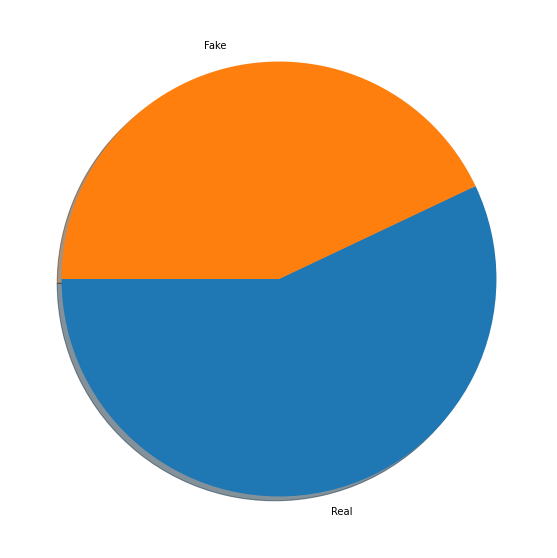

In [21]:
plt.figure(figsize=(15,10))
plt.pie(dataset['target'].value_counts(), labels=['Real', 'Fake'], shadow=True, startangle=180)

In [25]:
fake_df = dataset[dataset['target'] == 0]
real_df = dataset[dataset['target'] == 1]

In [26]:
fake_df.head()

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0


In [27]:
real_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## 1.1) Exploring real tweets 

In [28]:
real_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [29]:
real_df.isnull().sum()

id             0
keyword       42
location    1075
text           0
target         0
dtype: int64

#### Most common keywords with disaster

In [32]:
real_df['keyword'].value_counts()

derailment     39
wreckage       39
outbreak       39
debris         37
oil%20spill    37
               ..
blazing         1
epicentre       1
body%20bag      1
electrocute     1
ruin            1
Name: keyword, Length: 220, dtype: int64

In [33]:
real_df['keyword'].unique()

array([nan, 'ablaze', 'accident', 'airplane%20accident', 'ambulance',
       'annihilated', 'annihilation', 'apocalypse', 'armageddon', 'army',
       'arson', 'arsonist', 'attack', 'attacked', 'avalanche', 'battle',
       'bioterror', 'bioterrorism', 'blaze', 'blazing', 'bleeding',
       'blew%20up', 'blight', 'blizzard', 'blood', 'bloody', 'blown%20up',
       'body%20bag', 'body%20bagging', 'body%20bags', 'bomb', 'bombed',
       'bombing', 'bridge%20collapse', 'buildings%20burning',
       'buildings%20on%20fire', 'burned', 'burning',
       'burning%20buildings', 'bush%20fires', 'casualties', 'casualty',
       'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'derailed', 'derai

In [37]:
real_keywords = real_df['keyword'].value_counts().sort_values(ascending=False)

In [44]:
real_keywords_df = pd.DataFrame(real_keywords)
real_keywords_df.reset_index(inplace=True)
real_keywords_df.rename(columns={'index':'Keyword', 'keyword': 'Count'}, inplace=True)
real_keywords_df

,Keyword,Count
0,derailment,39
1,outbreak,39
2,wreckage,39
3,debris,37
4,typhoon,37
...,...,...
215,blazing,1
216,epicentre,1
217,body%20bag,1
218,electrocute,1


In [54]:
fig = px.bar(real_keywords_df[0:60], x = 'Keyword', y='Count')
fig.show()

### Exploring location with real disaster tweets

In [55]:
real_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [57]:
real_locations = real_df['location'].unique()
real_locations

array([nan, 'Birmingham', 'AFRICA', ..., "Xi'an, China", 'Santa Cruz, CA',
       'Manhattan, NY'], dtype=object)

In [59]:
real_df['location'].value_counts().head(60)

USA                            67
United States                  27
Nigeria                        22
India                          20
Mumbai                         19
UK                             16
London                         16
New York                       16
Washington, DC                 15
Canada                         13
Worldwide                      12
Washington, D.C.                9
Chicago, IL                     9
Australia                       9
Indonesia                       8
Los Angeles, CA                 8
California, USA                 8
Earth                           8
California                      7
New York, NY                    7
Nashville, TN                   7
Toronto                         7
Los Angeles                     7
San Francisco, CA               7
Sacramento, CA                  7
San Francisco                   6
Denver, Colorado                6
New York City                   6
US                              6
Ireland       